<a href="https://colab.research.google.com/github/praveenpareek11/digital-marketing/blob/master/miq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_FInalConversions

/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_Site_BrowingBehavior

In [0]:
import pandas as pd

In [0]:
final_df = pd.read_table('/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_FInalConversions', delim_whitespace=True, names=('Date', 'Time', 'UserID', 'ProductID', 'Amount'))

In [3]:
final_df.head()

,Date,Time,UserID,ProductID,Amount
0,2017-07-26,00:00:10.465,0,A293532,52.14
1,2017-07-26,00:00:12.301,0,H209597,31.50
2,2017-07-26,00:00:12.388,0,H211370,30.48
3,2017-07-26,00:00:14.389,0,A282331,51.00
4,2017-07-26,00:00:16.837,0,H211410,16.74


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 5 columns):
Date         79795 non-null object
Time         79795 non-null object
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.0+ MB


In [5]:
final_df['Date'].unique()

array(['2017-07-26'], dtype=object)

In [6]:
final_df['DateTime'] = final_df['Date'] + ' ' + final_df['Time']
final_df.head()

,Date,Time,UserID,ProductID,Amount,DateTime
0,2017-07-26,00:00:10.465,0,A293532,52.14,2017-07-26 00:00:10.465
1,2017-07-26,00:00:12.301,0,H209597,31.50,2017-07-26 00:00:12.301
2,2017-07-26,00:00:12.388,0,H211370,30.48,2017-07-26 00:00:12.388
3,2017-07-26,00:00:14.389,0,A282331,51.00,2017-07-26 00:00:14.389
4,2017-07-26,00:00:16.837,0,H211410,16.74,2017-07-26 00:00:16.837


In [0]:
final_df = final_df.drop(columns=['Date', 'Time'])

In [8]:
final_df.head()

,UserID,ProductID,Amount,DateTime
0,0,A293532,52.14,2017-07-26 00:00:10.465
1,0,H209597,31.50,2017-07-26 00:00:12.301
2,0,H211370,30.48,2017-07-26 00:00:12.388
3,0,A282331,51.00,2017-07-26 00:00:14.389
4,0,H211410,16.74,2017-07-26 00:00:16.837


In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
DateTime     79795 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [0]:
final_df['DateTime'] = pd.to_datetime(final_df['DateTime'])

In [11]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
DateTime     79795 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [0]:
final_df = final_df.set_index('DateTime')

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79795 entries, 2017-07-26 00:00:10.465000 to 2017-07-26 23:21:05.221000
Data columns (total 3 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [14]:
final_df.head()

,UserID,ProductID,Amount
DateTime,,,
2017-07-26 00:00:10.465,0,A293532,52.14
2017-07-26 00:00:12.301,0,H209597,31.50
2017-07-26 00:00:12.388,0,H211370,30.48
2017-07-26 00:00:14.389,0,A282331,51.00
2017-07-26 00:00:16.837,0,H211410,16.74


In [0]:
hourly_amount = (final_df['Amount'].groupby(final_df['Amount'].index.hour).sum()).sort_values(ascending=False)

In [16]:
hourly_amount.head()

DateTime
1     469330.16
0     425831.32
2     410735.92
3     358285.60
22    319672.62
Name: Amount, dtype: float64

In [0]:
hourly_count = (final_df['Amount'].groupby(final_df['Amount'].index.hour).count()).sort_values(ascending=False)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

Text(0.5, 0, 'Hours from 0 to 23')

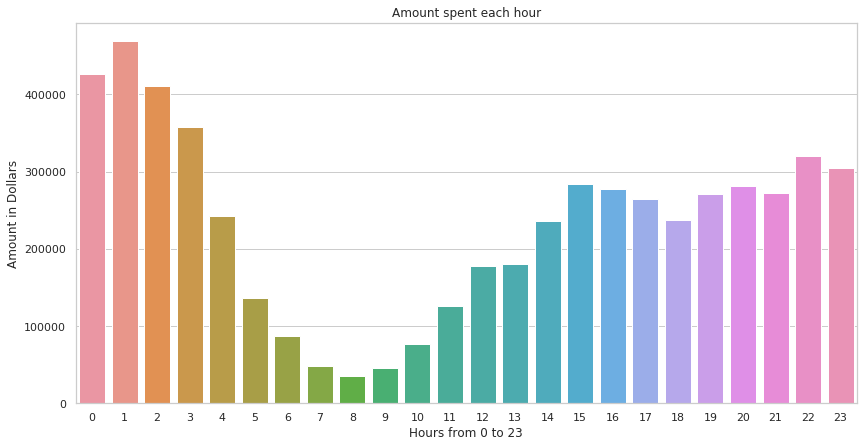

In [24]:
dims = (14,7)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x=hourly_amount.index, y=hourly_amount.values, ax=ax)
ax.set_title('Amount spent each hour')
ax.set_ylabel('Amount in Dollars')
ax.set_xlabel('Hours from 0 to 23')

Text(0.5, 0, 'Hours from 0 to 23')

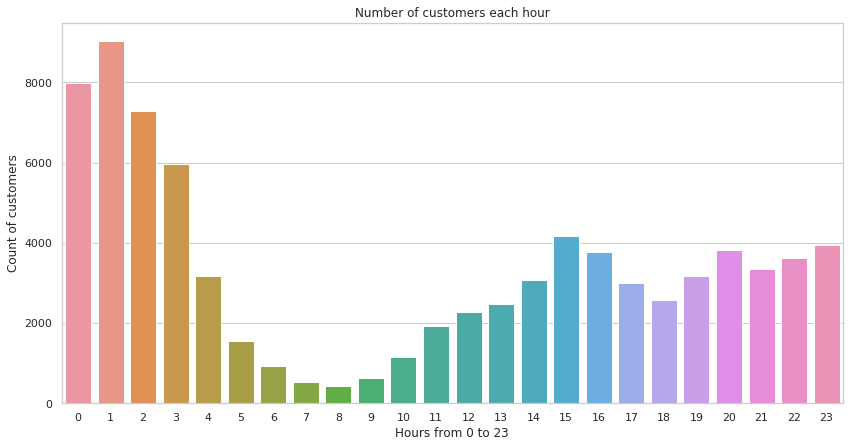

In [25]:
dims = (14,7)
fig1, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x=hourly_count.index, y=hourly_count.values, ax=ax)
ax.set_title('Number of customers each hour')
ax.set_ylabel('Count of customers')
ax.set_xlabel('Hours from 0 to 23')

In [0]:
# The amount pertaining to particular product in each hour.
product_sale = (final_df.groupby(final_df['ProductID'].index.hour).sum()).sort_values(by='Amount', ascending=False)

In [33]:
product_sale.head()

,UserID,Amount
DateTime,,
1,3.005329e+22,469330.16
0,2.658994e+22,425831.32
2,2.434387e+22,410735.92
3,1.936342e+22,358285.60
22,1.212991e+22,319672.62


Text(0.5, 0, 'Hours from 0 to 23')

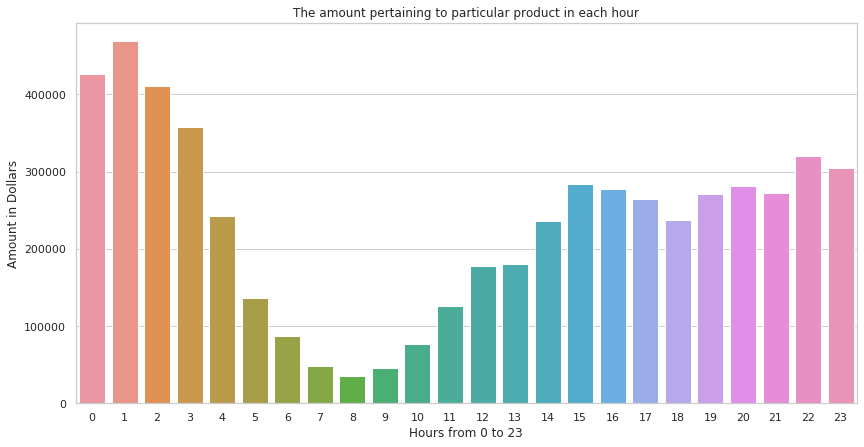

In [34]:
dims = (14,7)
fig1, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x=product_sale.index, y=product_sale.Amount, ax=ax)
ax.set_title('The amount pertaining to particular product in each hour')
ax.set_ylabel('Amount in Dollars')
ax.set_xlabel('Hours from 0 to 23')